Learning Pytorch for Lab
- resources: https://towardsdatascience.com/getting-started-with-pytorch-part-1-understanding-how-automatic-differentiation-works-5008282073ec

**Tensors**
- data structure in Pytorch similar to NumPy's ndarray but unlike the latter tensors can tap into the resources of a GPU to significantly speed up matrix operations

In [18]:
# Making tensors
import torch 
import numpy as np

# numpy array
arr = np.random.randn(3,5)

# create tensor from numpy array
tens = torch.from_numpy(arr)

# create another tensor
tens2 = torch.LongTensor([[2,4],[5,6]])

# create a random tensor
tens3 = torch.randn(4,3)

**Computational Graphs**

A computational graph is a directed graph where nodes correspond to operations or variables. Variables can feed their value into operations, and operations can feed their output into other operations. This way, every node in the graph defines a function of the variables

**Motivation** for computational graphs: this data structure allows you to efficiently apply to the chain rule to compute gradients for all of your parameters

- resources: http://www.deepideas.net/deep-learning-from-scratch-i-computational-graphs/
- This article explains computational graphs from scratch and also has Python scripts demonstrating how TensorFlow works under the hood.

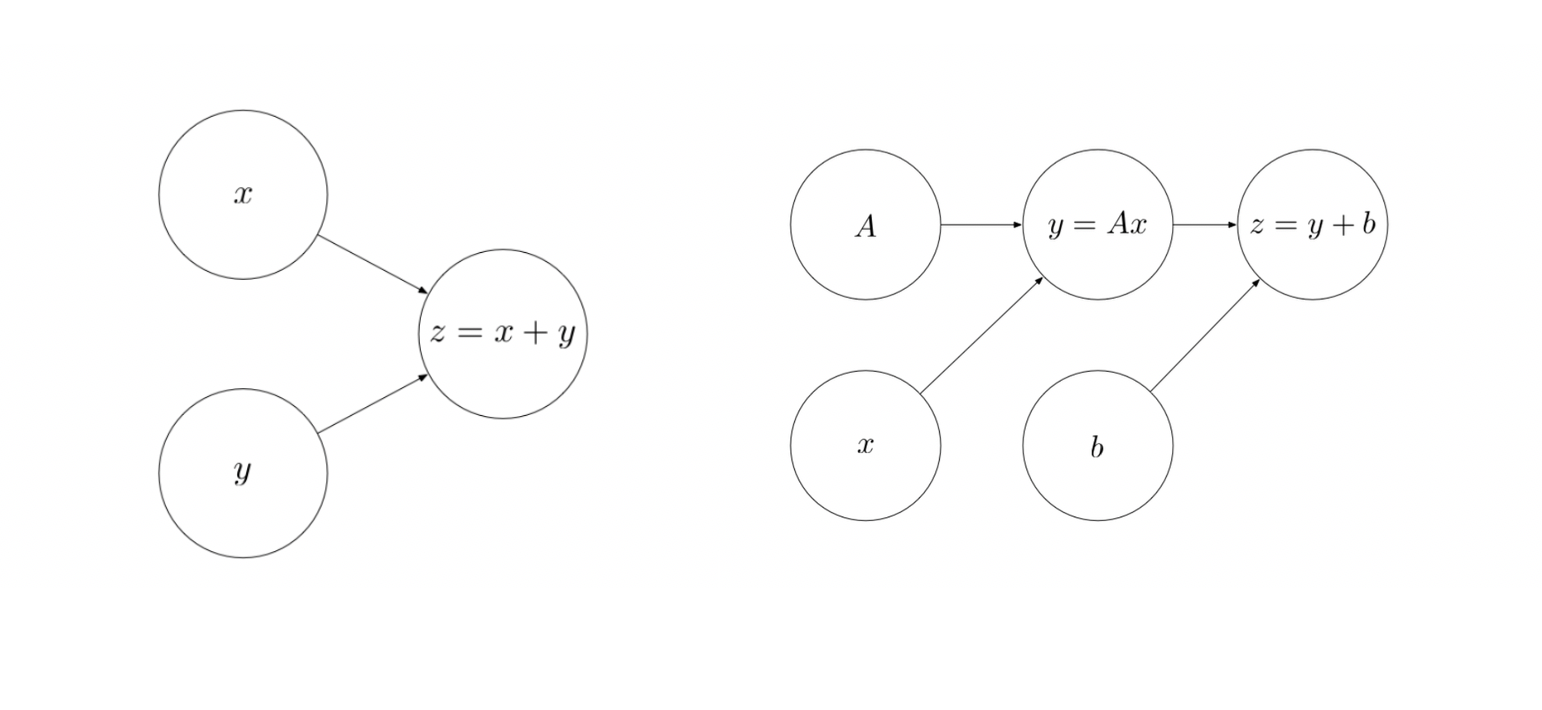

Suppose you have the following model:  

- b = w1 * a
- c = w2 * a
- d = (w3 * b) + (w4 * c)
- L = f(d)

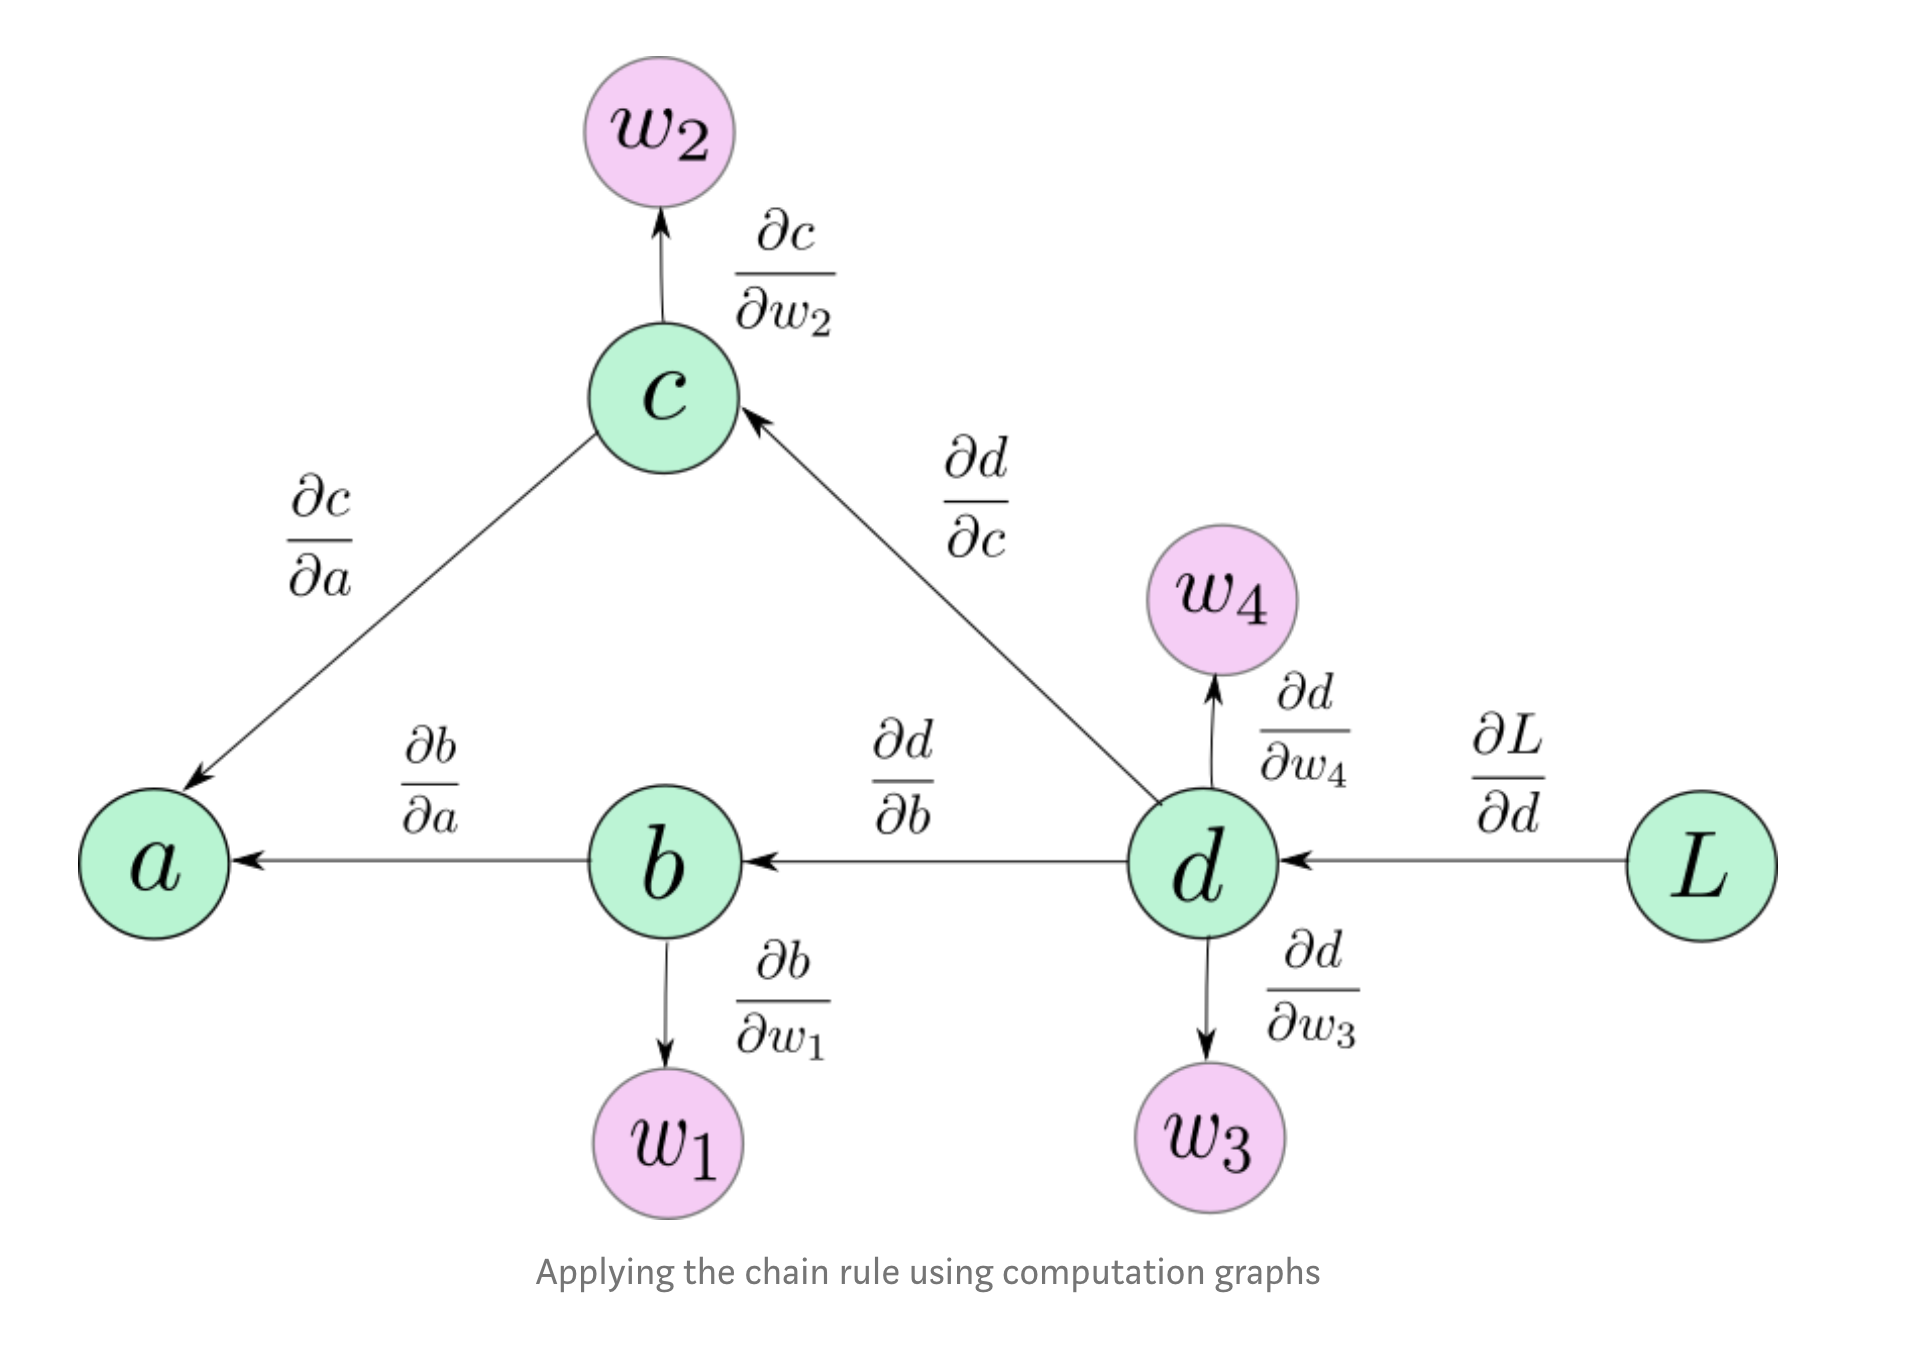
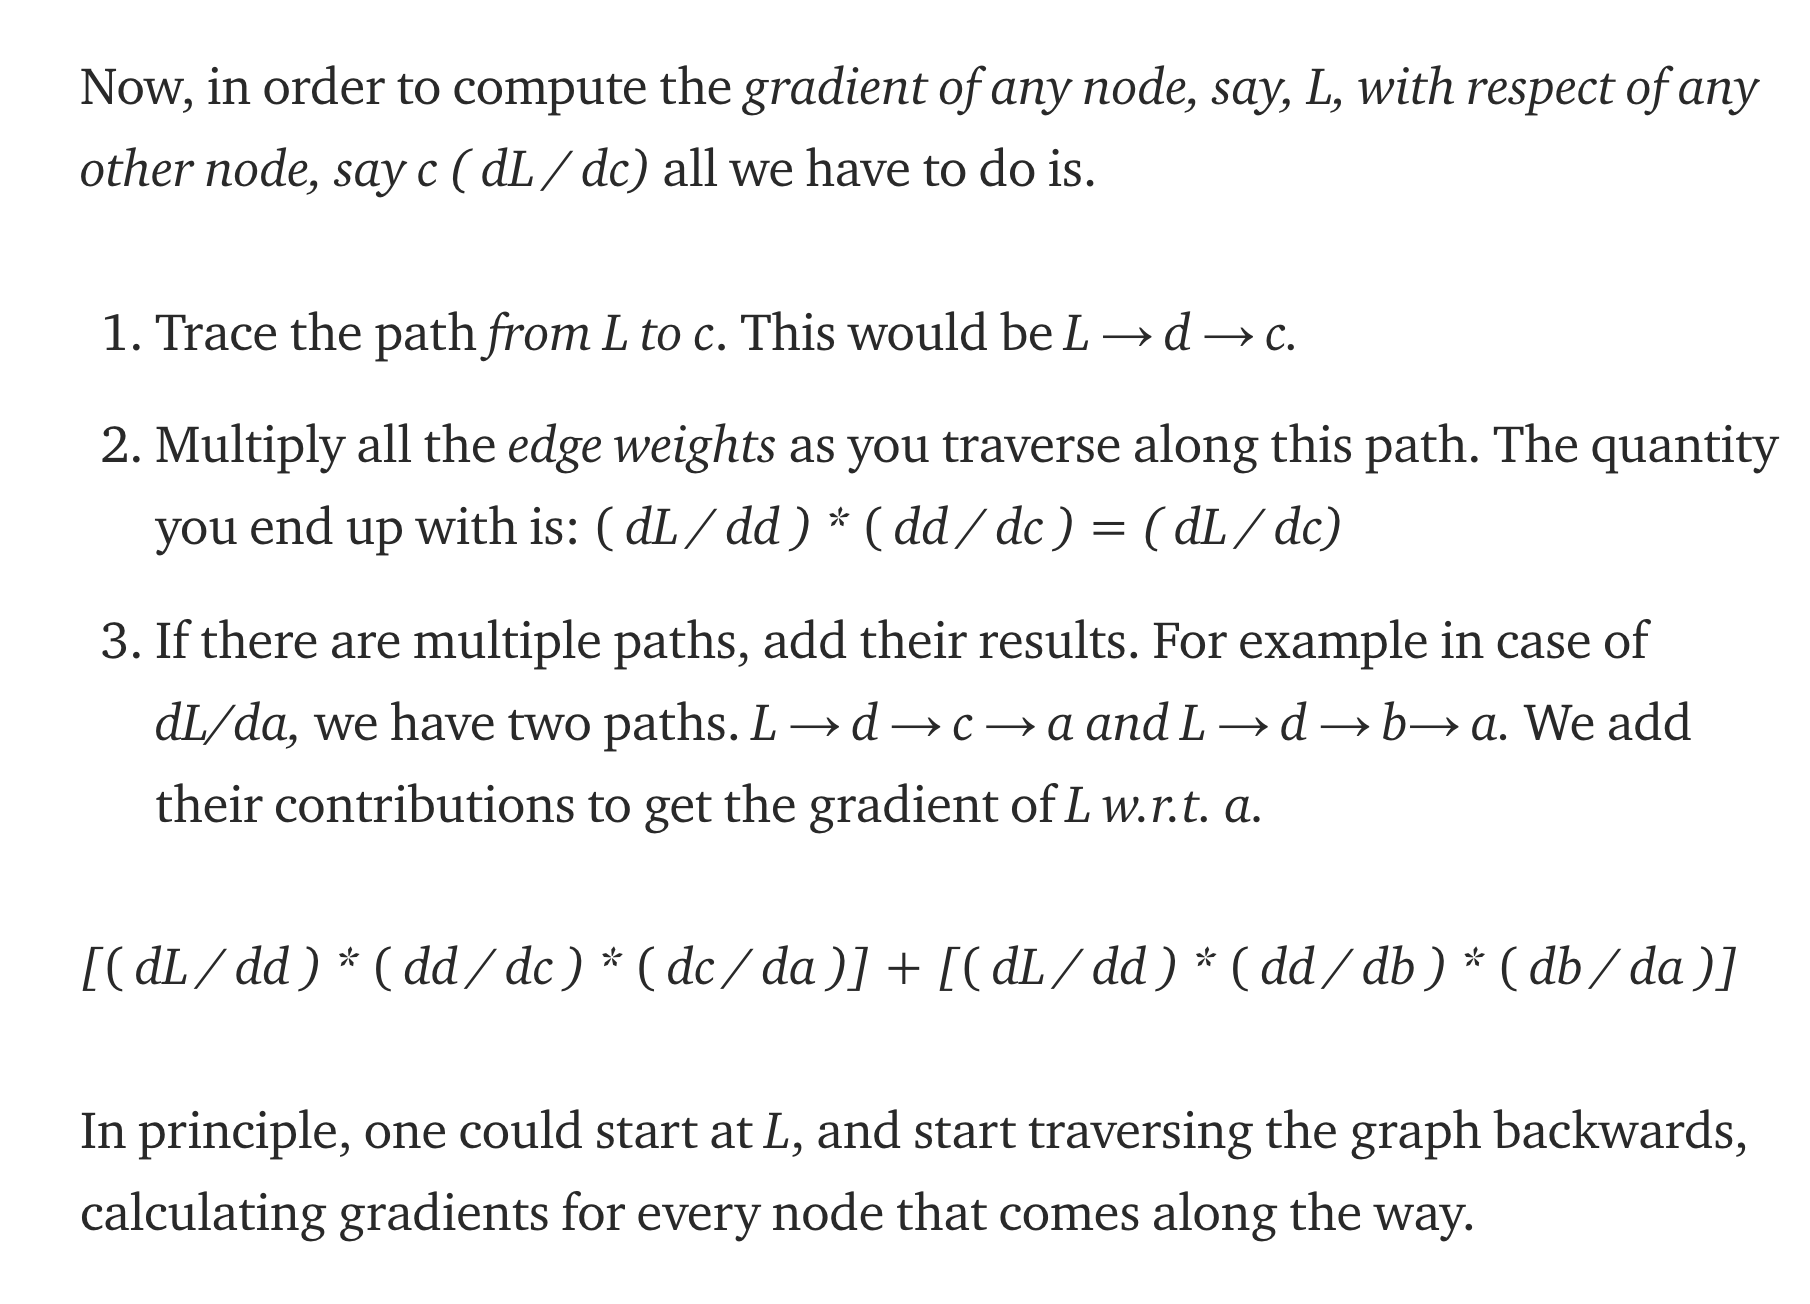


In [ ]:
from torch import FloatTensor
from torch.autograd import Variable

# Define the leaf nodes
# Set the requires_grad attribute to true otherwise these Variables won't be included
# in the computation graph and no gradients would be computed for them

a = Variable(FloatTensor([4]))
weights = [Variable(FloatTensor([i]), requires_grad=True) for i in (2, 5, 9, 7)]


The *Variable* is a class that is used to hold data. ***Variables are specifically tailored to hold values which change during training of a neural network, i.e. the learnable parameters of our network.*** Tensors on the other hand are used to store values that are not to be learned.  
  
  
**Attributes of Variables:**
1. A Variable class wraps a tensor. You can access this tensor by calling .data attribute of a variable.
2. The Variable also stores the gradient of a scalar quantity (say, loss) with respect to the parameter it holds. This gradient can be accessed by calling the .grad attribute. This is basically the gradient computed up to this particular node.
3. grad_fn is a Function object which created the variable.


In [38]:
# unpack the weights for nicer assignment
w1, w2, w3, w4 = weights
b = w1 * a
c = w2 * a
d = w3 * b + w4 * c
L = (10 - d)

# compute the gradients
L.backward()

for index, weight in enumerate(weights, start=1):
    gradient, *_ = weight.grad.data
    print(f"Gradient of w{index} with respect to L: {gradient}")

Gradient of w1 with respect to L: -36.0
Gradient of w2 with respect to L: -28.0
Gradient of w3 with respect to L: -8.0
Gradient of w4 with respect to L: -20.0


**Pytorch Basics**
- resource: https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py

In [39]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w*x + b

# Compute gradients
y.backward()

# Print out the gradients.
print(x.grad)
print(w.grad)
print(b.grad)



tensor(2.)
tensor(1.)
tensor(1.)


**Creating a neural network in PyTorch**

Goal: create a simple 4-layer fully connected neural network to classify the hand-written digits of the MNIST dataset. The architecture we'll use can be seen in the figure below.
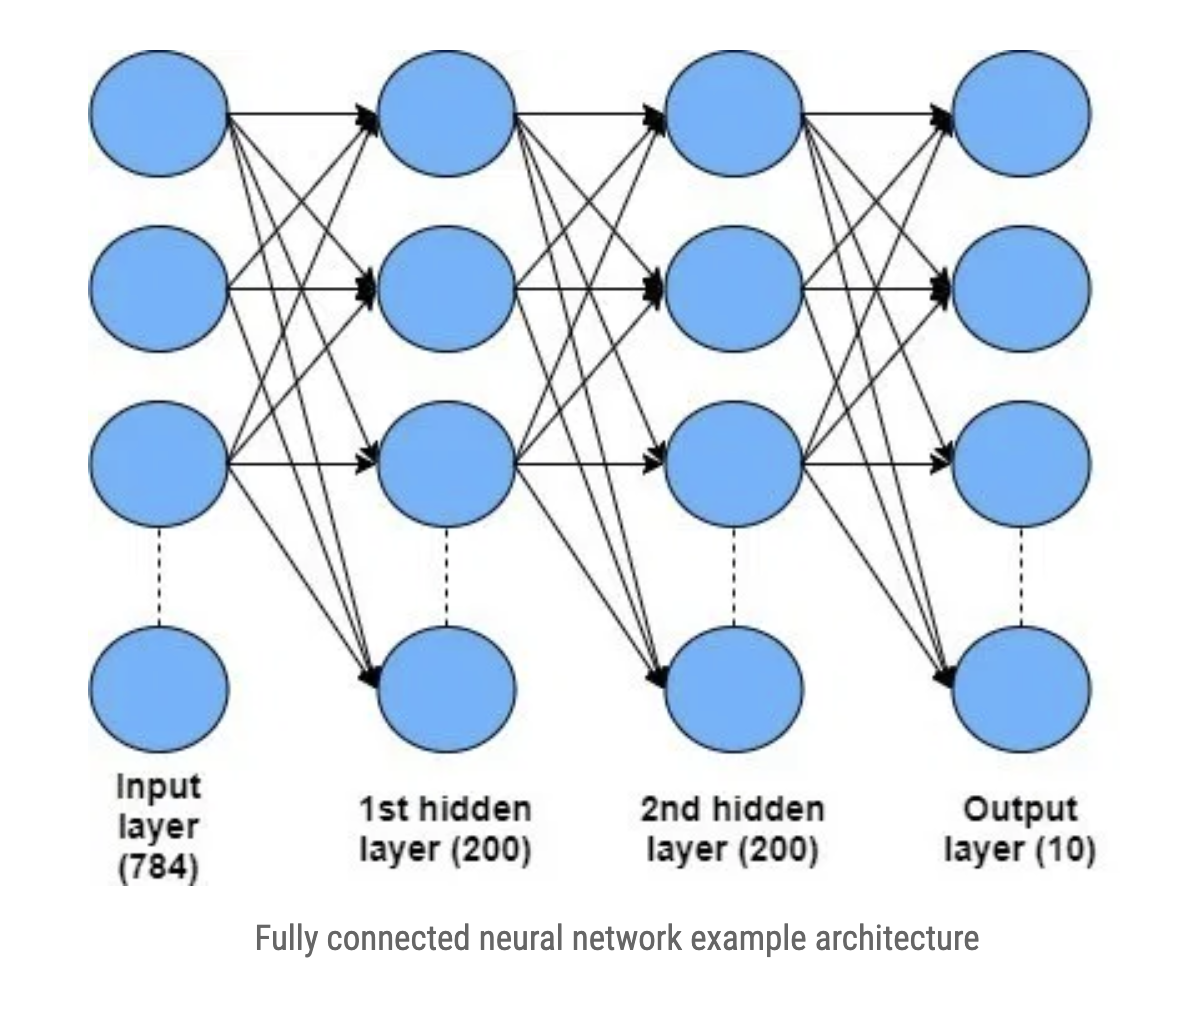

- resource: https://adventuresinmachinelearning.com/pytorch-tutorial-deep-learning/

- The input later consists of 28x28 greyscale pixels which constitute the input data of the MNIST dataset. This input is then 